# 3. Polynomial Regression

### 공부 시간에 따른 시험 점수 (우등생)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("../data/PolynomialRegressionData.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## 3-1. 단순 선형 회귀 (Simple Linear Regression)

In [3]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X, y) # 전체 데이터로 학습

LinearRegression()

### 데이터 시각화 (전체)

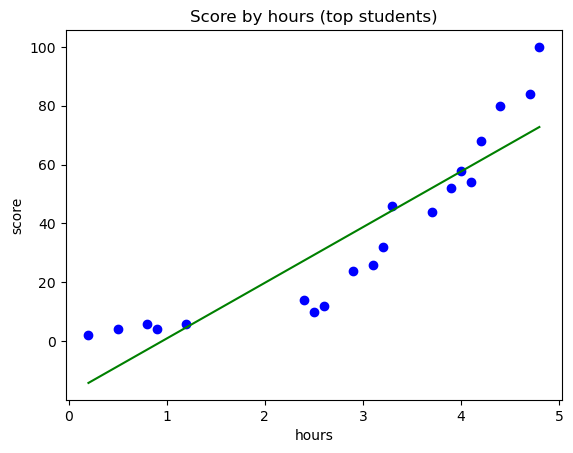

In [4]:
plt.title("Score by hours (top students)") # 제목
plt.scatter(X, y, color = "blue") # 산점도
plt.plot(X, reg.predict(X), color = "green") # 선 그래프
plt.xlabel("hours") # X축 이름
plt.ylabel("score") # Y축 이름
plt.show()

In [5]:
reg.score(X, y) # 전체 데이터를 통한 모델 평가

0.8169296513411765

## 3-2. 다항 회귀 (Polynomial Regression)

In [6]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4) # 2차 다항식
X_poly = poly_reg.fit_transform(X)
X_poly[:5]
# degree = 2, [x] -> [x^0, x^1, x^2] -> ex. x가 3이라면 [1, 3, 9] 로 변환

array([[1.0000e+00, 2.0000e-01, 4.0000e-02, 8.0000e-03, 1.6000e-03],
       [1.0000e+00, 5.0000e-01, 2.5000e-01, 1.2500e-01, 6.2500e-02],
       [1.0000e+00, 8.0000e-01, 6.4000e-01, 5.1200e-01, 4.0960e-01],
       [1.0000e+00, 9.0000e-01, 8.1000e-01, 7.2900e-01, 6.5610e-01],
       [1.0000e+00, 1.2000e+00, 1.4400e+00, 1.7280e+00, 2.0736e+00]])

In [7]:
X[:5]

array([[0.2],
       [0.5],
       [0.8],
       [0.9],
       [1.2]])

In [8]:
poly_reg.get_feature_names_out()

array(['1', 'x0', 'x0^2', 'x0^3', 'x0^4'], dtype=object)

In [9]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y) # 변환 된 X와 y로 모델 생성 (학습)

LinearRegression()

### 데이터 시각화 (변환된 X와 y)

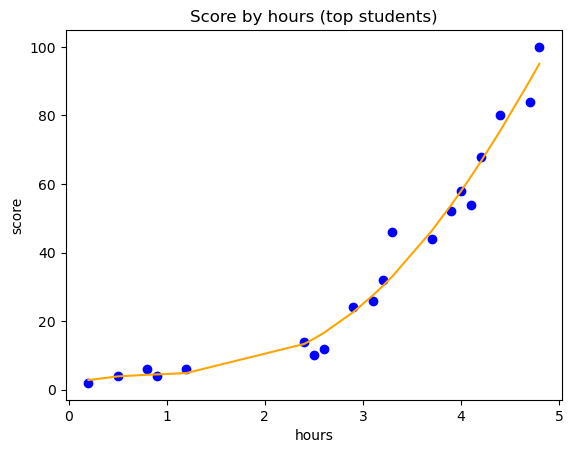

In [10]:
plt.title("Score by hours (top students)") # 제목
plt.scatter(X, y, color = "blue")
plt.plot(X, lin_reg.predict(X_poly), color = "orange")
plt.xlabel("hours") # X축 이름
plt.ylabel("score") # Y축 이름
plt.show()

In [11]:
X_range = np.arange(min(X), max(X), 0.1) # X의 최솟 값에서 최댓 값 까지의 범위를 0.1 단위로 잘라서 데이터를 생성
X_range.shape, X_range

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_3464\792540845.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_range = np.arange(min(X), max(X), 0.1) # X의 최솟 값에서 최댓 값 까지의 범위를 0.1 단위로 잘라서 데이터를 생성


((46,),
 array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4,
        1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7,
        2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. ,
        4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7]))

In [12]:
X_range = X_range.reshape(-1, 1) # (row 수, column 수), -1 -> row 수를 자동으로 계산, 1 column 수는 1개
X_range.shape, X_range

((46, 1),
 array([[0.2],
        [0.3],
        [0.4],
        [0.5],
        [0.6],
        [0.7],
        [0.8],
        [0.9],
        [1. ],
        [1.1],
        [1.2],
        [1.3],
        [1.4],
        [1.5],
        [1.6],
        [1.7],
        [1.8],
        [1.9],
        [2. ],
        [2.1],
        [2.2],
        [2.3],
        [2.4],
        [2.5],
        [2.6],
        [2.7],
        [2.8],
        [2.9],
        [3. ],
        [3.1],
        [3.2],
        [3.3],
        [3.4],
        [3.5],
        [3.6],
        [3.7],
        [3.8],
        [3.9],
        [4. ],
        [4.1],
        [4.2],
        [4.3],
        [4.4],
        [4.5],
        [4.6],
        [4.7]]))

In [13]:
X_range[:5]

array([[0.2],
       [0.3],
       [0.4],
       [0.5],
       [0.6]])

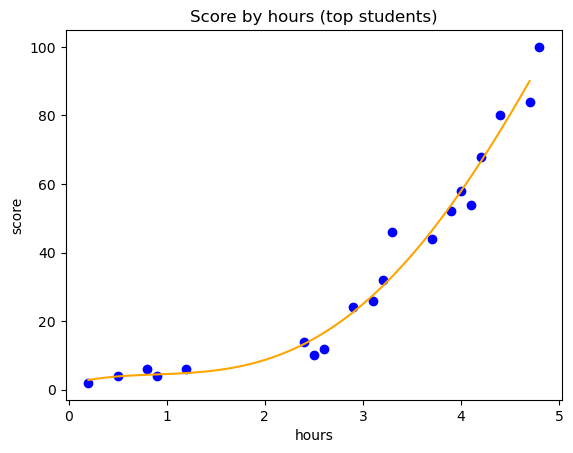

In [14]:
plt.title("Score by hours (top students)") # 제목
plt.scatter(X, y, color = "blue")
plt.plot(X_range, lin_reg.predict(poly_reg.fit_transform(X_range)), color = "orange")
plt.xlabel("hours") # X축 이름
plt.ylabel("score") # Y축 이름
plt.show()